In [7]:
import os
import pandas as pd
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

# 데이터 정의
districts = ["강남구", "송파구", "강서구", "은평구", "노원구", "관악구", "강동구", "성북구", "서초구", "양천구", "마포구", "중랑구", "광진구", "도봉구", "구로구", "동대문구", "영등포구", "강북구", "동작구", "서대문구", "용산구", "성동구", "금천구", "종로구", "중구"]
registration = [34843, 33706, 33636, 28005, 27138, 26408, 25515, 24200, 23786, 23770, 23441, 23018, 20272, 19873, 19412, 19074, 18997, 18585, 18509, 17781, 17760, 16889, 12925, 9577, 8042]
recommendation = [2.0, 2.0, 1.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
top_10_districts = ["강남구", "송파구", "강서구", "은평구", "노원구", "관악구", "강동구", "성북구", "서초구", "양천구"]
top_10_registrations = [34843, 33706, 33636, 28005, 27138, 26408, 25515, 24200, 23786, 23770]
top_10_recommendations = [2.0, 2.0, 1.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0]
accuracy_data = {"ranking_levels": ["상위 5개", "상위 10개", "상위 15개"], "accuracy_values": [100.0, 50.0, 40.0]}

# 데이터프레임 생성
df = pd.DataFrame({"구": districts, "등록수": registration, "추천점수": recommendation})
df_top10 = pd.DataFrame({"구": top_10_districts, "등록수": top_10_registrations, "추천점수": top_10_recommendations})
accuracy_df = pd.DataFrame({"랭킹": accuracy_data["ranking_levels"], "정확도": accuracy_data["accuracy_values"]})

# 추천여부 컬럼 추가
df['추천여부'] = df['추천점수'].apply(lambda v: '추천' if v > 0 else '비추천')

# 색상 팔레트 설정
colors = ['#1FB8CD', '#FFC185', '#ECEBD5', '#5D878F', '#D2BA4C', '#B4413C', '#964325', '#944454', '#13343B', '#DB4545']

# 상관관계 계산 및 회귀선 생성
x = df["등록수"]
y = df["추천점수"]

# 피어슨 상관계수 계산
correlation, p_value = pearsonr(x, y)
print(f"피어슨 상관계수: {correlation:.4f}")
print(f"p-값: {p_value:.6f}")

# 회귀선 계산
slope, intercept = np.polyfit(x, y, 1)
reg_line = slope * x + intercept



피어슨 상관계수: 0.6981
p-값: 0.000104


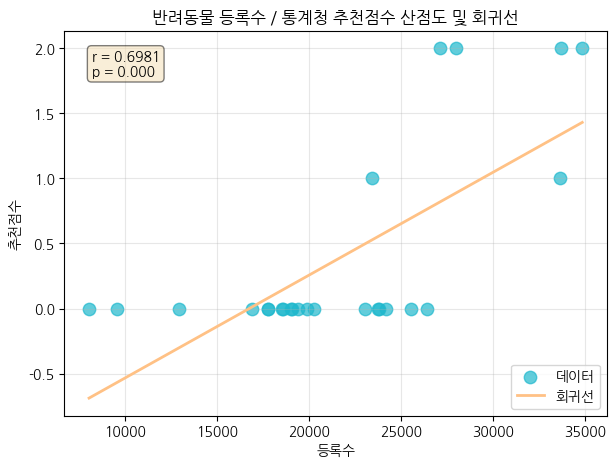

In [17]:
# 1. 산점도 + 회귀선
plt.figure(figsize=(7,5))
plt.scatter(x, y, color=colors[0], alpha=0.7, s=80, label='데이터')
plt.plot(x, reg_line, color=colors[1], linewidth=2, label='회귀선')
plt.xlabel('등록수')
plt.ylabel('추천점수')
plt.title('반려동물 등록수 / 통계청 추천점수 산점도 및 회귀선')
plt.legend()
plt.grid(True, alpha=0.3)
plt.text(0.05, 0.95, f'r = {correlation:.4f}\np = {p_value:.3f}', 
         transform=plt.gca().transAxes, 
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


save_dir = os.path.expanduser('~/eda-repo-3/RESULT/visualization')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)


plt.savefig(os.path.join(save_dir, "반려동물_등록수_통계청_추천점수_산점도_및_회귀선.png"))
# plt.show()

/tmp/ipykernel_18771/2924529597.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(box_data,


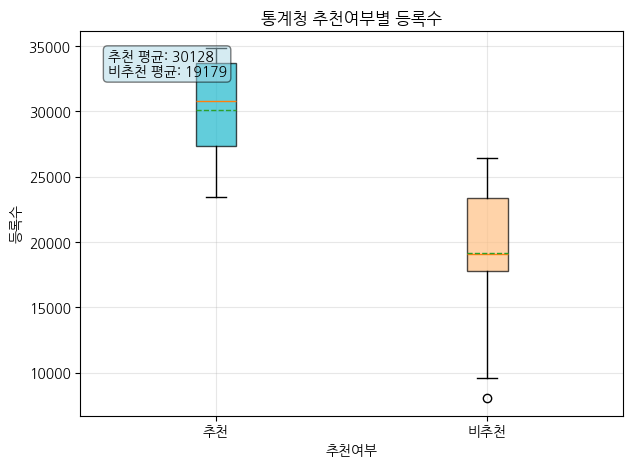

In [18]:
# 2. 박스플롯: 추천여부별 등록수
plt.figure(figsize=(7,5))
box_data = [df[df['추천여부'] == '추천']['등록수'].values,
            df[df['추천여부'] == '비추천']['등록수'].values]
bp = plt.boxplot(box_data, 
                 patch_artist=True, 
                 showmeans=True, 
                 meanline=True, 
                 labels=['추천', '비추천'])

# 박스 색상 지정
bp['boxes'][0].set_facecolor(colors[0])
bp['boxes'][1].set_facecolor(colors[1])
bp['boxes'][0].set_alpha(0.7)
bp['boxes'][1].set_alpha(0.7)

plt.xlabel('추천여부')
plt.ylabel('등록수')
plt.title('통계청 추천여부별 등록수')
plt.grid(True, alpha=0.3)

mean_recommended = df[df['추천여부'] == '추천']['등록수'].mean()
mean_non_recommended = df[df['추천여부'] == '비추천']['등록수'].mean()
plt.text(0.05, 0.95, f'추천 평균: {mean_recommended:.0f}\n비추천 평균: {mean_non_recommended:.0f}', 
         transform=plt.gca().transAxes, 
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.savefig(os.path.join(save_dir, "통계청_추천여부별_등록수_boxplot.png"))


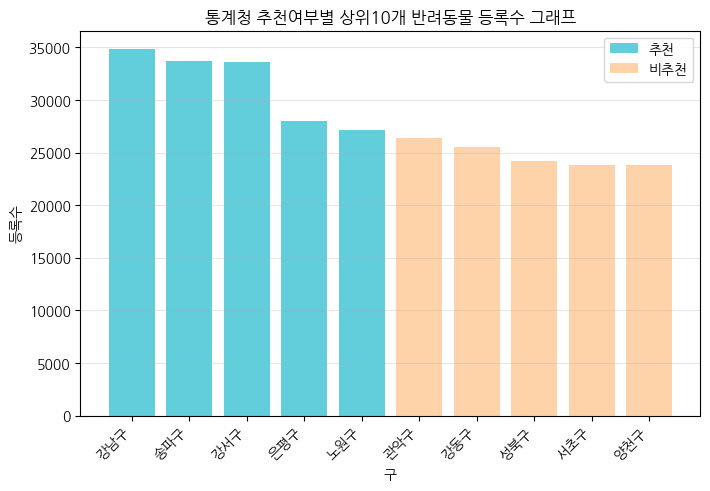

In [19]:
# 3. 막대그래프: 상위 10개 구, 추천점수에 따른 색상
plt.figure(figsize=(8,5))
bar_colors = [colors[0] if v > 0 else colors[1] for v in df_top10['추천점수']]
bars = plt.bar(df_top10['구'], df_top10['등록수'], color=bar_colors, alpha=0.7)
plt.xlabel('구')
plt.ylabel('등록수')
plt.title('통계청 추천여부별 상위10개 반려동물 등록수 그래프')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[0], alpha=0.7, label='추천'),
                   Patch(facecolor=colors[1], alpha=0.7, label='비추천')]
plt.legend(handles=legend_elements, loc='upper right')
plt.savefig(os.path.join(save_dir, "통계청_추천여부별_상위10개_반려동물_등록수_막대그래프.png"))
# plt.show()


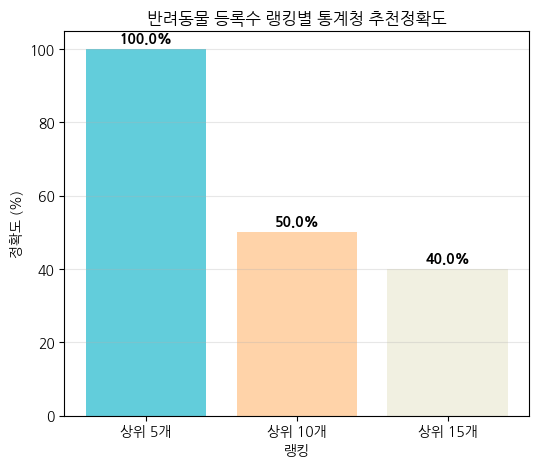

In [14]:
# 4. 막대그래프: 랭킹별 추천정확도
plt.figure(figsize=(6,5))
bars_acc = plt.bar(accuracy_df['랭킹'], accuracy_df['정확도'], color=colors[:3], alpha=0.7)
plt.xlabel('랭킹')
plt.ylabel('정확도 (%)')
plt.title('반려동물 등록수 랭킹별 통계청 추천정확도')
plt.ylim(0, 105)
plt.grid(True, alpha=0.3, axis='y')

for bar, acc in zip(bars_acc, accuracy_df['정확도']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{acc:.1f}%', ha='center', va='bottom', fontweight='bold')
# plt.show()
plt.savefig(os.path.join(save_dir, "반려동물_등록수_랭킹별_통계청_추천정확도.png"))
